In [1]:
from selenium.webdriver.common.keys import Keys
import csv
import datetime
import time
import os
from selenium import webdriver

import matplotlib.pyplot as plt
import collections
from openpyxl import load_workbook

import math
import statistics
import numpy as np


## 爬蟲


In [78]:
def set_driver():

    options = webdriver.ChromeOptions()  # Set up Chinese
    # options.add_argument('--headless')
    options.add_argument('lang=zh_CN.UTF-8')  # Replacement of head
    options.add_argument(
        'User-Agent="Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36"')
    driver = webdriver.Chrome(
        DRIVER_PATH,
        options=options)

    driver.get(main_url)


    return driver


def init_filename(source, subject):
    # /呱吉/PTT.csv
    # /呱吉/FB.csv
    # ...
    folder = f"/{source}/"
    return subject + folder 

def write_file():
    out_filename = ""
    with open(out_filename, 'a') as out_file:
        for line in in_file:

            out_file.write(parsed_line)


def init_csv(file_name):

    with open(file_name, 'w') as out_file:
        write = csv.writer(out_file)
        header = ['Source', 'Title', 'Link', 'Date', 'Summary', 'Text', 'Like']
        # PTT, 呱吉吃大便, http://, '2021-11-17', XXXX, XXXXX, 23
        write.writerow(header)

def string_to_datetime(s):
    return datetime.datetime.strptime(s, '%Y/%m/%d')


In [60]:
DRIVER_PATH = "/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/stratechery crawler/chromedriver"
main_url = "https://www.ettoday.net/news/tag/%E5%91%B1%E5%90%89/"
driver = set_driver()

<ipython-input-3-1ef20b2f6373>:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(


In [61]:
# create new CSV
filename = "froggy_ettoday.csv"
# init_csv(filename)

In [64]:
# crawler (要自己滑到最下面)
block_div = driver.find_element_by_class_name("c1")
title_list = block_div.find_elements_by_xpath(".//div[@class='piece clearfix']")

press = title_list[-1].find_element_by_tag_name("h3").find_element_by_tag_name("a")
press.send_keys(Keys.NULL)


time.sleep(5)

# 重新抓一次
block_div = driver.find_element_by_class_name("c1")
title_list = block_div.find_elements_by_xpath(
    ".//div[@class='piece clearfix']")
len(title_list)


<ipython-input-64-e8ad8769a653>:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  block_div = driver.find_element_by_class_name("c1")
<ipython-input-64-e8ad8769a653>:11: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  block_div = driver.find_element_by_class_name("c1")


146

In [65]:
with open(filename, 'a') as f:
    write = csv.writer(f)
    for i in title_list:
        title = i.find_element_by_tag_name('h3').text
        title = title.replace("  ", " ")
        link = i.find_element_by_tag_name('a').get_attribute("href")
        summary = i.find_element_by_class_name('summary').text
        date = i.find_element_by_class_name('date').text
        line = [title, link, date, summary]
        write.writerow(line)


## 讀呱吉新聞

In [106]:
froggy_news = []
with open(filename, encoding="utf-8") as f:
    reader = csv.reader(f)
    for row in reader:
        if row == ['Title', 'Link', 'Date', 'Summary']: continue

        Title = "".join(row[0].split())
        Link = row[1]
        Date = row[2].split(" ")[0].replace('-', '/')
        Summary = "".join(row[3].split())

        froggy_news.append({"title": Title, "link": Link, "date": Date, "summary":Summary})

froggy_news[1]

{'title': '一隻阿圓「走鐘獎發防疫品」呱吉砸700萬打造典禮：去年有小瑕疵',
 'link': 'https://www.ettoday.net/news/20211113/2123204.htm?from=pctaglist',
 'date': '2021/11/13',
 'summary': 'YouTube頻道上班不要看今（13日）舉辦第3屆走鐘獎頒獎典禮，負責人呱吉（邱威傑）表示今年作品比以往多，角逐的作品有1500件，在評選花了非常多時間，最後選出34個獎項，透露這屆規模較往年盛大，花了700萬元打造典禮，「跟以前規模有差10倍左右，上一屆3、400萬左右，第一屆約3、40萬。」'}

In [13]:
# 網路溫度計資料
a = {"params": {"max": "20211107", "min": "20210809", "tn": "\u5471\u5409", "q": "(\u90b1\u8b70\u54e1&(youtube|\u7db2\u7d05|\u7db2\u8def\u7d05\u4eba|\u4e0a\u73ed\u4e0d\u8981\u770b|NSFW))|\u90b1\u5a01\u5091|\u5357\u5bae\u535a\u58eb|\u74dc\u5409|\u5471\u5409!href", "rows": "20", "sort": "-cc", "token": "ThisTokenShouldOnlyBeUsedForEditorsOfDailyviewAndOneShouldRespectTheTermsOfUseWhenUsingItAndPleaseDoNotAbuseIt", "type": ["NEWS", "SM", "BBS", "BLOG"]}, "total": 63709, "date": ["2021/08/09", "2021/08/10", "2021/08/11", "2021/08/12", "2021/08/13", "2021/08/14", "2021/08/15", "2021/08/16", "2021/08/17", "2021/08/18", "2021/08/19", "2021/08/20", "2021/08/21", "2021/08/22", "2021/08/23", "2021/08/24", "2021/08/25", "2021/08/26", "2021/08/27", "2021/08/28", "2021/08/29", "2021/08/30", "2021/08/31", "2021/09/01", "2021/09/02", "2021/09/03", "2021/09/04", "2021/09/05", "2021/09/06", "2021/09/07", "2021/09/08", "2021/09/09", "2021/09/10", "2021/09/11", "2021/09/12", "2021/09/13", "2021/09/14", "2021/09/15", "2021/09/16", "2021/09/17", "2021/09/18", "2021/09/19", "2021/09/20", "2021/09/21", "2021/09/22", "2021/09/23", "2021/09/24", "2021/09/25", "2021/09/26", "2021/09/27", "2021/09/28", "2021/09/29", "2021/09/30", "2021/10/01", "2021/10/02", "2021/10/03", "2021/10/04", "2021/10/05", "2021/10/06", "2021/10/07", "2021/10/08", "2021/10/09", "2021/10/10", "2021/10/11", "2021/10/12", "2021/10/13", "2021/10/14", "2021/10/15", "2021/10/16", "2021/10/17", "2021/10/18", "2021/10/19", "2021/10/20", "2021/10/21", "2021/10/22", "2021/10/23", "2021/10/24", "2021/10/25", "2021/10/26", "2021/10/27", "2021/10/28", "2021/10/29", "2021/10/30", "2021/10/31", "2021/11/01", "2021/11/02", "2021/11/03", "2021/11/04", "2021/11/05", "2021/11/06", "2021/11/07"], "data": [{"tn": "\u5471\u5409", "q": "(\u90b1\u8b70\u54e1&(youtube|\u7db2\u7d05|\u7db2\u8def\u7d05\u4eba|\u4e0a\u73ed\u4e0d\u8981\u770b|NSFW))|\u90b1\u5a01\u5091|\u5357\u5bae\u535a\u58eb|\u74dc\u5409|\u5471\u5409!href", "g": [43, 160, 133, 411, 251, 110, 47, 47, 34, 106, 87, 147, 53, 24, 42, 31, 66, 184, 924, 341, 179, 132, 235, 155, 234, 212, 60, 35, 180, 47, 190, 87, 172, 54, 781, 255, 155, 148, 128, 221, 137, 57, 46, 1531, 1344, 469, 337, 91, 80, 66, 170, 555, 217, 4935, 3851, 5031, 2306, 964, 642, 709, 1461, 1129, 465, 198, 1166, 1156, 365, 380, 94, 161, 1666, 591, 347, 185, 542, 365, 205, 119, 57, 48, 5203, 4617, 2530, 568, 770, 2788, 4432, 979, 469, 213, 1], "pc": "100.0%", "t": 63709}], "version": "v1", "status": "success"}
daily_view_data = collections.OrderedDict()
for day, qty in zip(a['date'], a['data'][0]['g']):
    daily_view_data[day] = qty
    


In [5]:
# opview 資料（聲量）
wb = load_workbook(filename='單主題_趨勢_20210801_20211109.xlsx')
op_view_data = collections.OrderedDict()
opview_wb = wb['日趨勢']
for i in range(2, opview_wb.max_row+1):
    day = opview_wb.cell(column=1, row=i).value
    qty = opview_wb.cell(column=2, row=i).value

    if day >= "2021/08/09" and day <= "2021/11/07":
        op_view_data[day] = qty
    
# opview 資料（情緒）
wb = load_workbook(filename="單主題_情緒_20210801_20211109.xlsx")
op_view_emotion = collections.OrderedDict(
    {'good': collections.OrderedDict(), 'bad': collections.OrderedDict()})
opview_wb = wb['日情緒趨勢']
for i in range(2, opview_wb.max_row+1):

    day = opview_wb.cell(column=1, row=i).value
    good = opview_wb.cell(column=2, row=i).value
    bad = opview_wb.cell(column=3, row=i).value
    total = opview_wb.cell(column=4, row=i).value

    if day >= "2021/08/09" and day <= "2021/11/07":
        op_view_emotion["good"][day] = good
        op_view_emotion["bad"][day] = bad


/Users/bobo/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [19]:
len(list(op_view_data.values())), type(list(op_view_data.values()))


(91, list)

## 定義事件

In [156]:
MULTIPLY = 3
# event definition
data = [list(op_view_data.values())[0]] * 7
data.extend(list(op_view_data.values()))

count = 0
event_list = []

for i, d in enumerate(data[7:], start=7):
    seven_day = data[i-7:i]
    seven_day_avg = sum(seven_day)/7
    if d > MULTIPLY * seven_day_avg and i > 0 and i < 91:
        day = list(op_view_data.keys())[i]
        event_list.append(day)

print(event_day)


2021-08-18 00:00:00


In [158]:
MULTIPLY = 3
print('單日大於', MULTIPLY, '倍過去七天的平均：')


# event definition
data = [list(op_view_data.values())[0]] * 7
data.extend(list(op_view_data.values()))

count = 0
event_list = []

for i, d in enumerate(data[7:], start=7):
    seven_day = data[i-7:i]
    seven_day_avg = sum(seven_day)/7
    if d > MULTIPLY * seven_day_avg and i > 0 and i < 91:
        day = list(op_view_data.keys())[i]
        event_list.append(day)



# find news
print('事件日期      日期好壞比  新聞日期     新聞日期好壞比    新聞標題')
for i in froggy_news:
    day_add = datetime.timedelta(days=5)
    news_date = string_to_datetime(i['date'])
    for event in event_list:
        event_day = string_to_datetime(event)
        if news_date >= event_day and news_date <= event_day + day_add:
            
            print(event_day.strftime('%Y-%m-%d'), ' ',
                  '%.2f' % (round(op_view_emotion['good'][event] / op_view_emotion['bad'][event], 2) ), '    ',
                  news_date.strftime('%Y-%m-%d'), '  '
                  '%.2f' % (round(op_view_emotion['good'][i['date']] / op_view_emotion['bad'][i['date']], 2) ), '       ',
                  i['title'])
            break


單日大於 3 倍過去七天的平均：
事件日期      日期好壞比  新聞日期     新聞日期好壞比    新聞標題
2021-11-04   0.13      2021-11-05   0.42         20場公投意見發表會時程曝連勝文談萊豬、呱吉VS黃士修辯核四
2021-10-08   0.26      2021-10-13   0.25         熊好券預算未審先抽呱吉開炮柯文哲：情緒勒索算什麼卵蛋正義？
2021-10-08   0.26      2021-10-12   0.80         快訊／呱吉不再參選！她繼承衣缽投入民進黨2022港湖區議員初選
2021-10-08   0.26      2021-10-08   0.26         喜劇圈回收龍龍！東區德聲援…呱吉心疼：就算是Bitch，也是我們的
2021-09-28   0.28      2021-10-03   0.19         才開嗆呱吉！龍龍遭爆「炎上找4寫手」：沒聲稱我的本是自己寫的
2021-09-28   0.28      2021-10-01   0.21         呱吉道歉龍龍了！「挖出1年前PO文」點名老K霸凌：應該道歉
2021-09-28   0.28      2021-10-01   0.21         龍龍暴怒開戰呱吉：噁不噁心！「400字火力滿點」親揭被誣衊真相
2021-09-28   0.28      2021-10-01   0.21         驚爆「龍龍爆氣退群組」內幕！呱吉酒後直播：我不知怎跟她相處
2021-09-28   0.28      2021-09-28   0.28         陳柏惟台語問政掀論戰呱吉「一句話力挺」！網怒嗆：這叫硬拗
2021-09-03   1.66      2021-09-07   3.00         疫情衝擊、市場需求呱吉提議「開放網路賣酒」逾5000人連署
2021-08-17   0.43      2021-08-21   1.00         樂透獎金「越疊加越多人買」！議員一句分析超神網笑噴：準爆


## 觀察大量差異

In [122]:
# opview daily difference 
data = list(op_view_data.values())
op_view_diff = collections.OrderedDict()
for idx, day in enumerate(op_view_data):
    if idx == 0:
        op_view_diff[day] = 0
        continue
    diff = math.log(abs((data[idx] - data[idx-1]) ))
    op_view_diff[day] = diff


In [279]:
# large difference
large_diff = []
large_diff_bool_list = []
mean = np.mean(list(op_view_diff.values()))
stdev = np.std(list(op_view_diff.values()))
for day, value in op_view_diff.items():
    if abs(value) > mean + stdev:
        large_diff.append(day)
        large_diff_bool_list.append(5)
    else:
        large_diff_bool_list.append(np.nan)


large_diff


['2021/09/21',
 '2021/09/22',
 '2021/10/01',
 '2021/10/03',
 '2021/10/04',
 '2021/10/05',
 '2021/10/10',
 '2021/10/12',
 '2021/10/18',
 '2021/10/19',
 '2021/10/28',
 '2021/10/30',
 '2021/10/31',
 '2021/11/02',
 '2021/11/03',
 '2021/11/04']

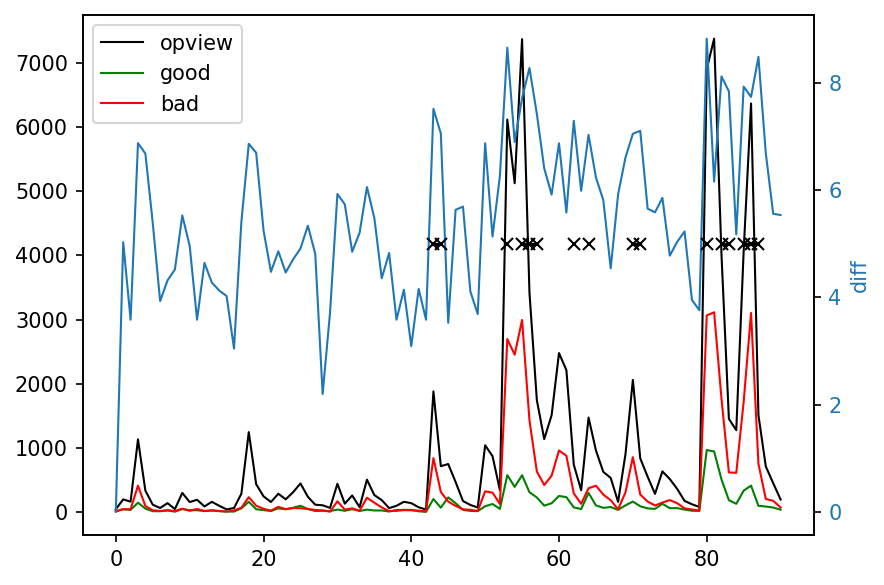

In [280]:
fig, ax1 = plt.subplots(dpi=150)
# ax1.plot(daily_view_data.values(), figure=fig, linewidth=1, c='orange', label="dailyview")
ax1.plot(op_view_data.values(), figure=fig, linewidth=1, c='black', label="opview")
ax1.plot(op_view_emotion["good"].values(), figure=fig, linewidth=1, c='g', label="good")
ax1.plot(op_view_emotion["bad"].values(), figure=fig, linewidth=1, c='r', label="bad")


ax1.legend()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('diff', color=color)  # we already handled the x-label with ax1
ax2.plot(op_view_diff.values(), linewidth=1, label="diff")
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(large_diff_bool_list, marker="x", color='black')
# ax2.set_ylim([0, 200])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


## 文字雲

In [282]:
froggy_hot_title = []
froggy_hot_news = []
for news in froggy_news:
    if news['date'] in large_diff:
        print(news['title'])
        froggy_hot_title.append(news['title'])
        froggy_hot_news.append(news['summary'])

柯文哲「無視」監視器畫面曝光網看完嗆爆呱吉：雙標打臉自己
柯文哲突襲議員辦公室呱吉動怒捶桌：企圖製造「不願見面假象」
快訊／呱吉不再參選！她繼承衣缽投入民進黨2022港湖區議員初選
才開嗆呱吉！龍龍遭爆「炎上找4寫手」：沒聲稱我的本是自己寫的
呱吉道歉龍龍了！「挖出1年前PO文」點名老K霸凌：應該道歉
龍龍暴怒開戰呱吉：噁不噁心！「400字火力滿點」親揭被誣衊真相
驚爆「龍龍爆氣退群組」內幕！呱吉酒後直播：我不知怎跟她相處
呱吉稱不需太在意被譏「塔綠班」：民進黨以前就是這樣贏國民黨的


In [160]:
froggy_hot_news

NameError: name 'froggy_hot_news' is not defined

In [283]:
import jieba

In [284]:
hot_news_word_list = []
for sentence in froggy_hot_news:
    seg_list = jieba.cut(sentence)
    # print('/'.join(seg_list))
    words = " ".join(seg_list).split(" ")
    print(words)

    hot_news_word_list = hot_news_word_list + words


['台北市', '長', '柯文', '哲為', '拚', '熊好券', '預算', '過關', '，', '上周', '赴', '議員辦', '公室', '爭取', '支持', '，', '但', '卻', '指控', '議員', '都', '躲', '起來', '了', '，', '此話', '一出', '另', '台北市', '議員', '「', '呱吉', '」', '、', '邱威傑', '勃然大怒', '，', '反', '嗆', '是', '柯文', '哲視', '而', '不見', '，', '揚言要', '調出', '監視器', '畫面', '還原', '。', '不過', '，', '網友', '看到', '畫面', '後', '猛酸呱吉', '，', '明明', '是', '電梯', '出口', '的', '「', '擦肩', '而過', '」', '，', '「', '這', '到底', '是', '有', '甚麼', '好', '吵', '的', '」', '。']
['台北市', '政府', '推出', '的', '「', '熊好券', '」', '因違', '背', '預算', '審查', '程序', '，', '5', '億', '預算', '墊', '付案', '被', '台北市', '議會', '暫擱', '，', '台北市', '長', '柯文', '哲', '27', '日', '中午', '拜會', '台北市', '議會', '新黨', '黨團', '，', '臨時', '決定', '結束', '後', '要', '拜訪', '其他', '台北市', '議員', '，', '但', '該筆', '預算', '最終', '仍', '因', '朝野', '議員', '無共識', '暫割', '。', '台北市', '議員', '「', '呱吉', '」', '邱威傑', '28', '日', '於', '議會動', '怒', '拍桌', '，', '直批', '市府', '沒有', '事先', '知會', '，', '而', '柯文', '哲', '也', '當場', '道歉', '「', '我們', '錯', '了', '。', '」']
['各政黨', '逐步', '布局', '2022', '大選', '。', '過去',

In [285]:
' '.join(hot_news_word_list)


'台北市 長 柯文 哲為 拚 熊好券 預算 過關 ， 上周 赴 議員辦 公室 爭取 支持 ， 但 卻 指控 議員 都 躲 起來 了 ， 此話 一出 另 台北市 議員 「 呱吉 」 、 邱威傑 勃然大怒 ， 反 嗆 是 柯文 哲視 而 不見 ， 揚言要 調出 監視器 畫面 還原 。 不過 ， 網友 看到 畫面 後 猛酸呱吉 ， 明明 是 電梯 出口 的 「 擦肩 而過 」 ， 「 這 到底 是 有 甚麼 好 吵 的 」 。 台北市 政府 推出 的 「 熊好券 」 因違 背 預算 審查 程序 ， 5 億 預算 墊 付案 被 台北市 議會 暫擱 ， 台北市 長 柯文 哲 27 日 中午 拜會 台北市 議會 新黨 黨團 ， 臨時 決定 結束 後 要 拜訪 其他 台北市 議員 ， 但 該筆 預算 最終 仍 因 朝野 議員 無共識 暫割 。 台北市 議員 「 呱吉 」 邱威傑 28 日 於 議會動 怒 拍桌 ， 直批 市府 沒有 事先 知會 ， 而 柯文 哲 也 當場 道歉 「 我們 錯 了 。 」 各政黨 逐步 布局 2022 大選 。 過去 曾 以 社民黨籍 參選 2018 台北市 第五 選區 （ 中正 、 萬華 ） 的 無黨籍 台北市 議員 邱威傑 （ 呱吉 ） 辦公 室主任 許菡 芸 ， 傳出 投入 民進 黨港 湖區 議員 的 初選 。 對此 ， 邱威傑 12 日 在 臉書 證實 此事 ， 並 表示 自己 一直 說 不會 繼續 參選 ， 但 一走了之 好像 沒給 選民 交代 ， 有 一個 辦公 室主任 願意 繼承衣 缽 ， 等 於 扛下 他 的 這棒責任 ， 讓 他 如釋 重負 ， 許菡 芸 一定 可以 做 得 比 他 更好 。 脫口秀 演員 「 龍龍 」 控訴 被 薩泰爾 班底 「 老 K 」 出言 霸凌 ， 之 後 又 被 呱吉 （ 邱威傑 ） 開 直播 暗指 不好 相處 ， 風波 延燒 至今 戰火 依然 猛烈 。 而 她 之前 表示 從 正式 登台 至今 ， 單口 喜劇 的 稿子 都 是 自己 寫 的 ， 3 日 卻 在 回應 中 提到 「 沒聲 稱 我 的 本 是 自己 寫 的 」 ， 遭質疑 雙重 標準 。 脫口秀 演員 「 龍龍 」 控訴 被 薩泰爾 班底 「 老 K 」 出言 霸凌 ， 也 不滿 被 呱吉開 直播 貼 上 難 相處 的 標 籤 ， 1 日 

In [264]:
i
out_filename = "froggy_hot_news.txt"
with open(out_filename, 'a') as out_file:
    
    out_file.write(" ".join(hot_news_word_list))
   

